# Deep Packet Models Evaluation

## Import Libraries

In [1]:
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt

from ml.utils import load_application_classification_cnn_model, load_traffic_classification_cnn_model, normalise_cm
from ml.metrics import confusion_matrix, get_classification_report
from utils import ID_TO_APP, ID_TO_TRAFFIC

## Configuration

In [2]:
# plot dpi
mpl.rcParams['figure.dpi'] = 300

# model path
application_classification_cnn_model_path = 'model/application_classification.cnn.model'
traffic_classification_cnn_model_path = 'model/traffic_classification.cnn.model'

# test data path
application_classification_test_data_path = 'train_test_data/application_classification/test.parquet'
traffic_classification_test_data_path = 'train_test_data/traffic_classification/test.parquet'

## Load Model

In [3]:
application_classification_cnn = load_application_classification_cnn_model(application_classification_cnn_model_path,
                                                                           gpu=True)
traffic_classification_cnn = load_traffic_classification_cnn_model(traffic_classification_cnn_model_path, gpu=True)

## Performance

In [4]:
def plot_confusion_matrix(cm, labels):
    normalised_cm = normalise_cm(cm)
    fig, ax = plt.subplots(figsize=(12, 12))
    sns.heatmap(
        data=normalised_cm, cmap='YlGnBu',
        xticklabels=labels, yticklabels=labels,
        annot=True, ax=ax, fmt='.2f'
    )
    ax.set_xlabel('Predict labels')
    ax.set_ylabel('True labels')
    fig.show()

### Application Classification

#### CNN

In [5]:
app_cnn_cm = confusion_matrix(
    data_path=application_classification_test_data_path,
    model=application_classification_cnn,
    num_class=len(ID_TO_APP)
)

Resolving data files:   0%|          | 0/200 [00:00<?, ?it/s]

Using custom data configuration test.parquet-9a38b872ca4b9d8f
Reusing dataset parquet (.cache/huggingface/datasets/parquet/test.parquet-9a38b872ca4b9d8f/0.0.0/1638526fd0e8d960534e2155dc54fdff8dce73851f21f031d2fb9c2cf757c121)


  0%|          | 0/1 [00:00<?, ?it/s]

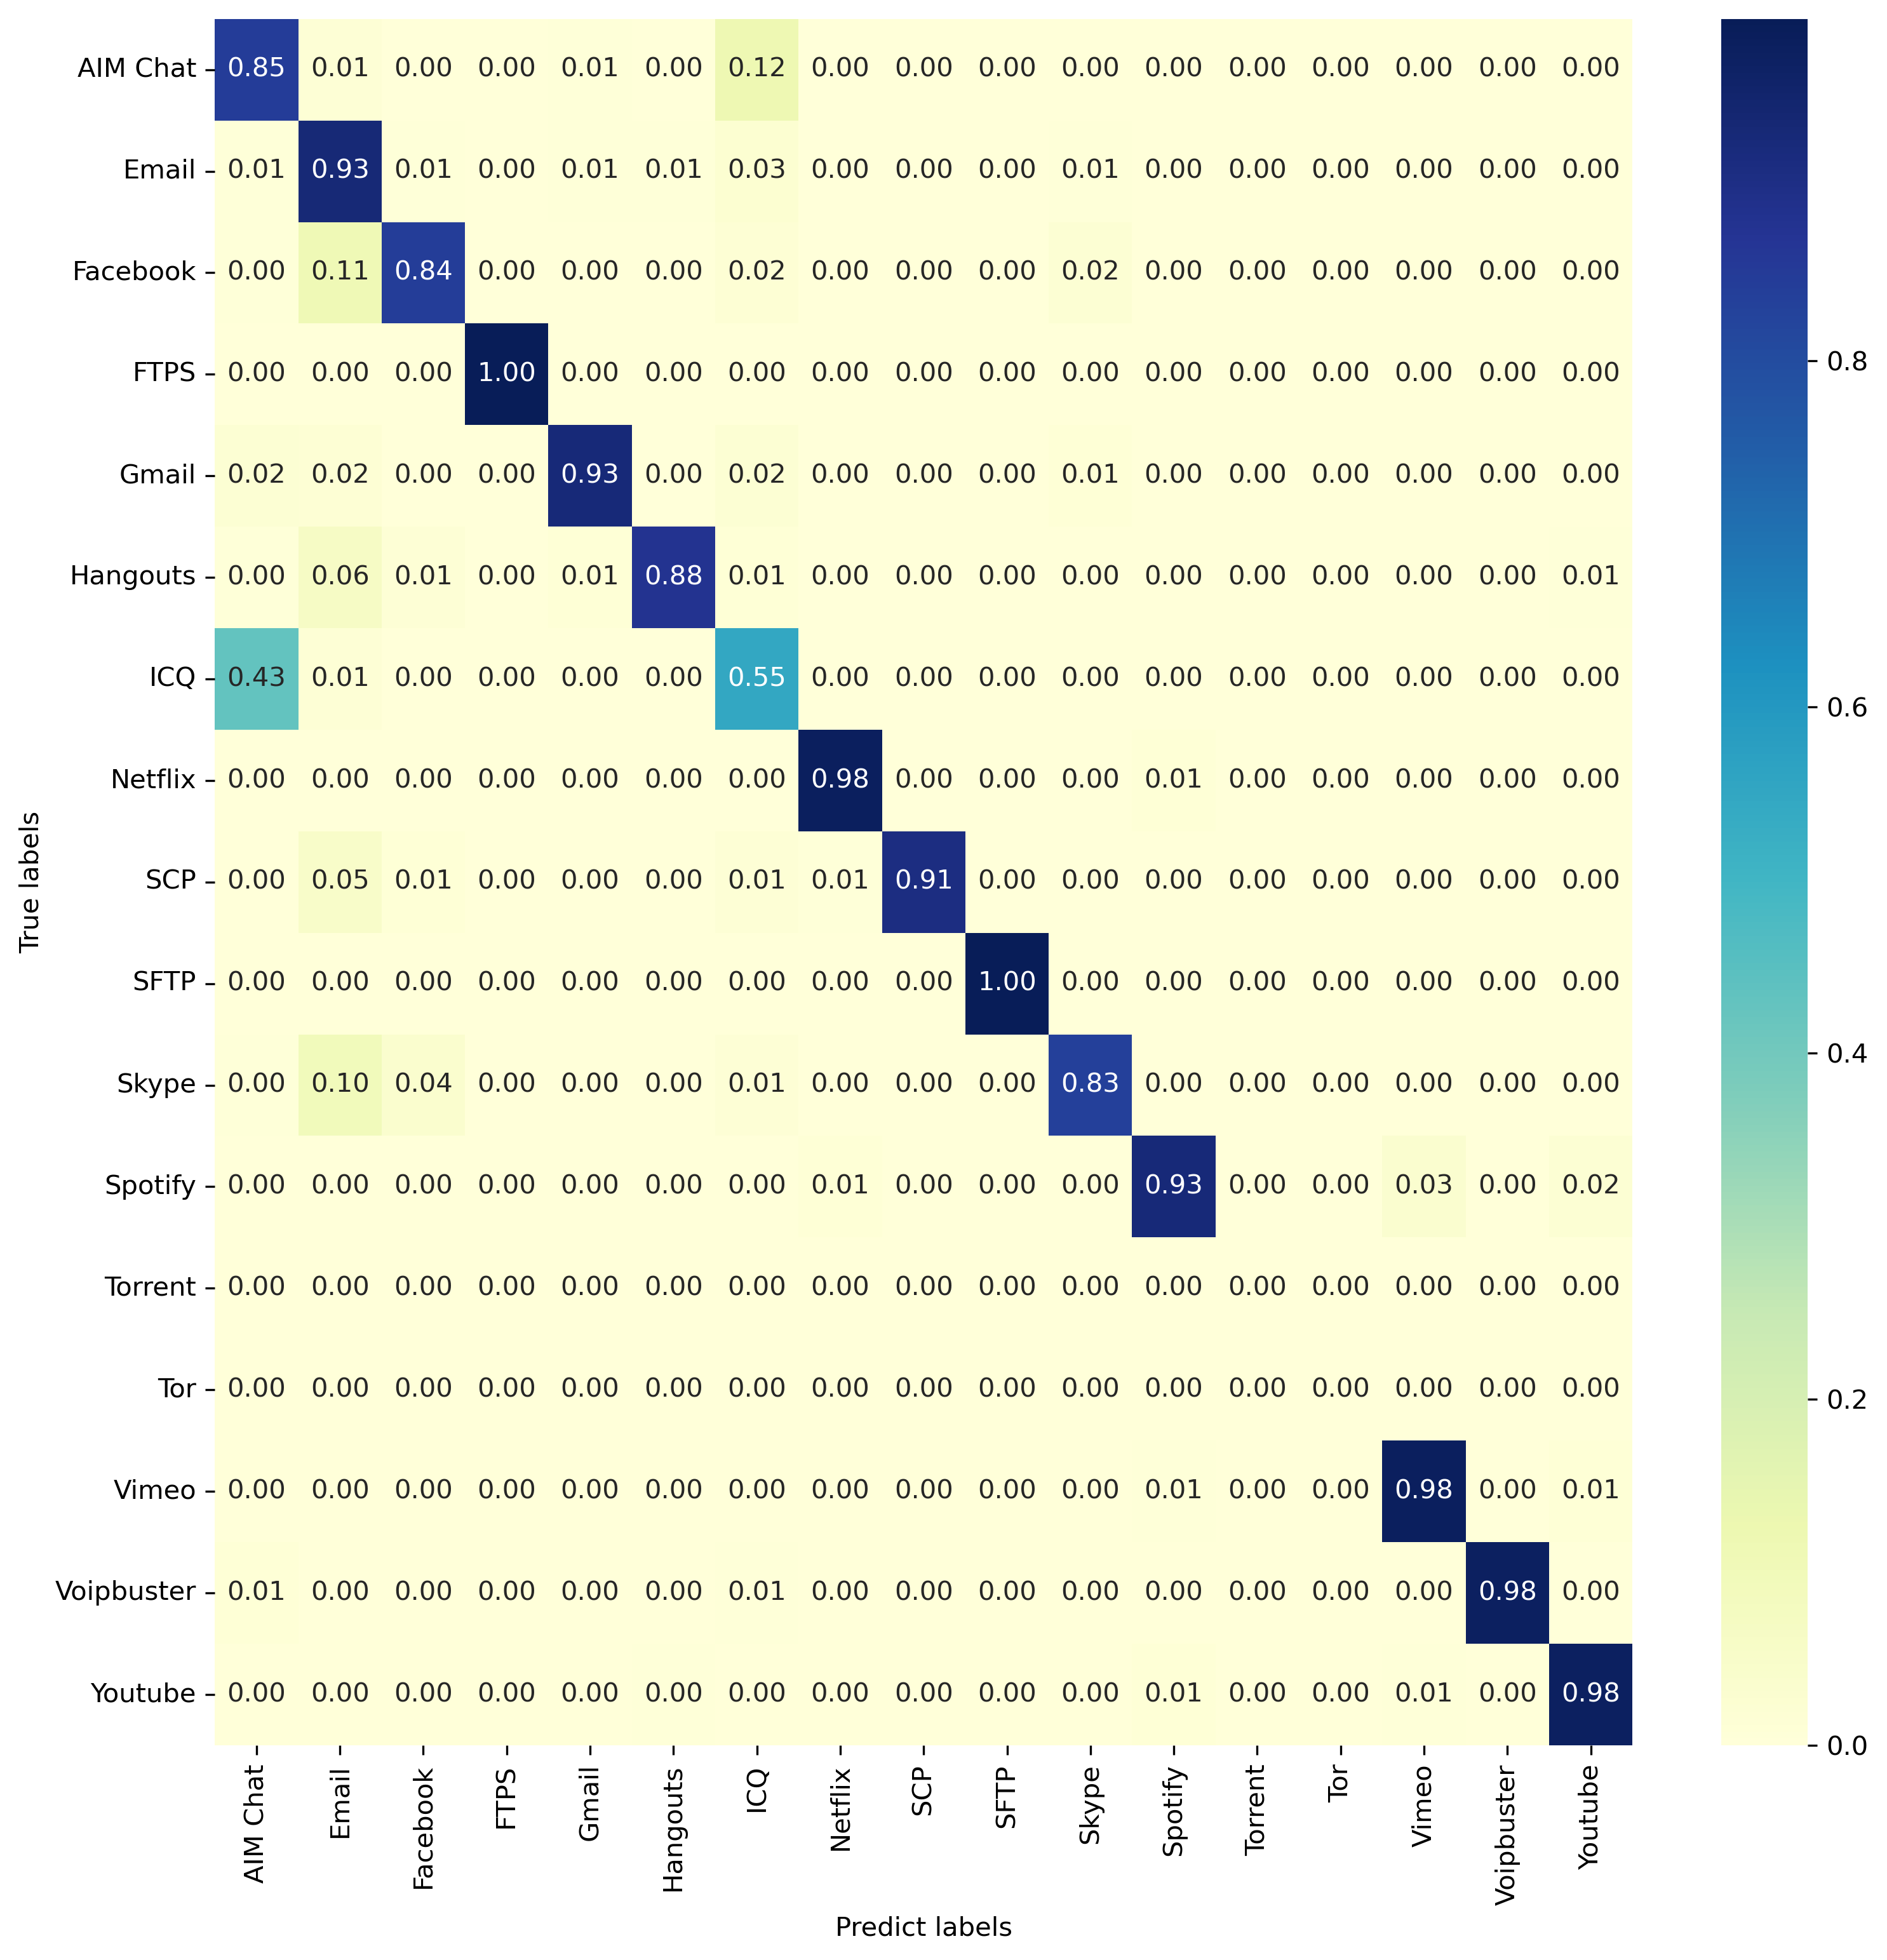

In [6]:
app_labels = []
for i in sorted(list(ID_TO_APP.keys())):
    app_labels.append(ID_TO_APP[i])
plot_confusion_matrix(app_cnn_cm, app_labels)

In [7]:
get_classification_report(app_cnn_cm, app_labels)

/tmp/pycharm_project_842/ml/metrics.py:42: RuntimeWarning: invalid value encountered in double_scalars
  return tp / tp_fp
/tmp/pycharm_project_842/ml/metrics.py:49: RuntimeWarning: invalid value encountered in double_scalars
  return tp / p


,label,precision,recall
0,AIM Chat,0.052082,0.849032
1,Email,0.063249,0.933733
2,Facebook,0.915949,0.842165
3,FTPS,0.999321,0.997513
4,Gmail,0.136699,0.929459
5,Hangouts,0.995565,0.880321
6,ICQ,0.012101,0.547887
7,Netflix,0.957444,0.982746
8,SCP,0.985160,0.910013
9,SFTP,0.984059,0.995251


### Traffic Classification

#### CNN

In [8]:
traffic_cnn_cm = confusion_matrix(
    data_path=traffic_classification_test_data_path,
    model=traffic_classification_cnn,
    num_class=len(ID_TO_TRAFFIC)
)


Resolving data files:   0%|          | 0/200 [00:00<?, ?it/s]

Using custom data configuration test.parquet-79fc087121e86871
Reusing dataset parquet (.cache/huggingface/datasets/parquet/test.parquet-79fc087121e86871/0.0.0/1638526fd0e8d960534e2155dc54fdff8dce73851f21f031d2fb9c2cf757c121)


  0%|          | 0/1 [00:00<?, ?it/s]

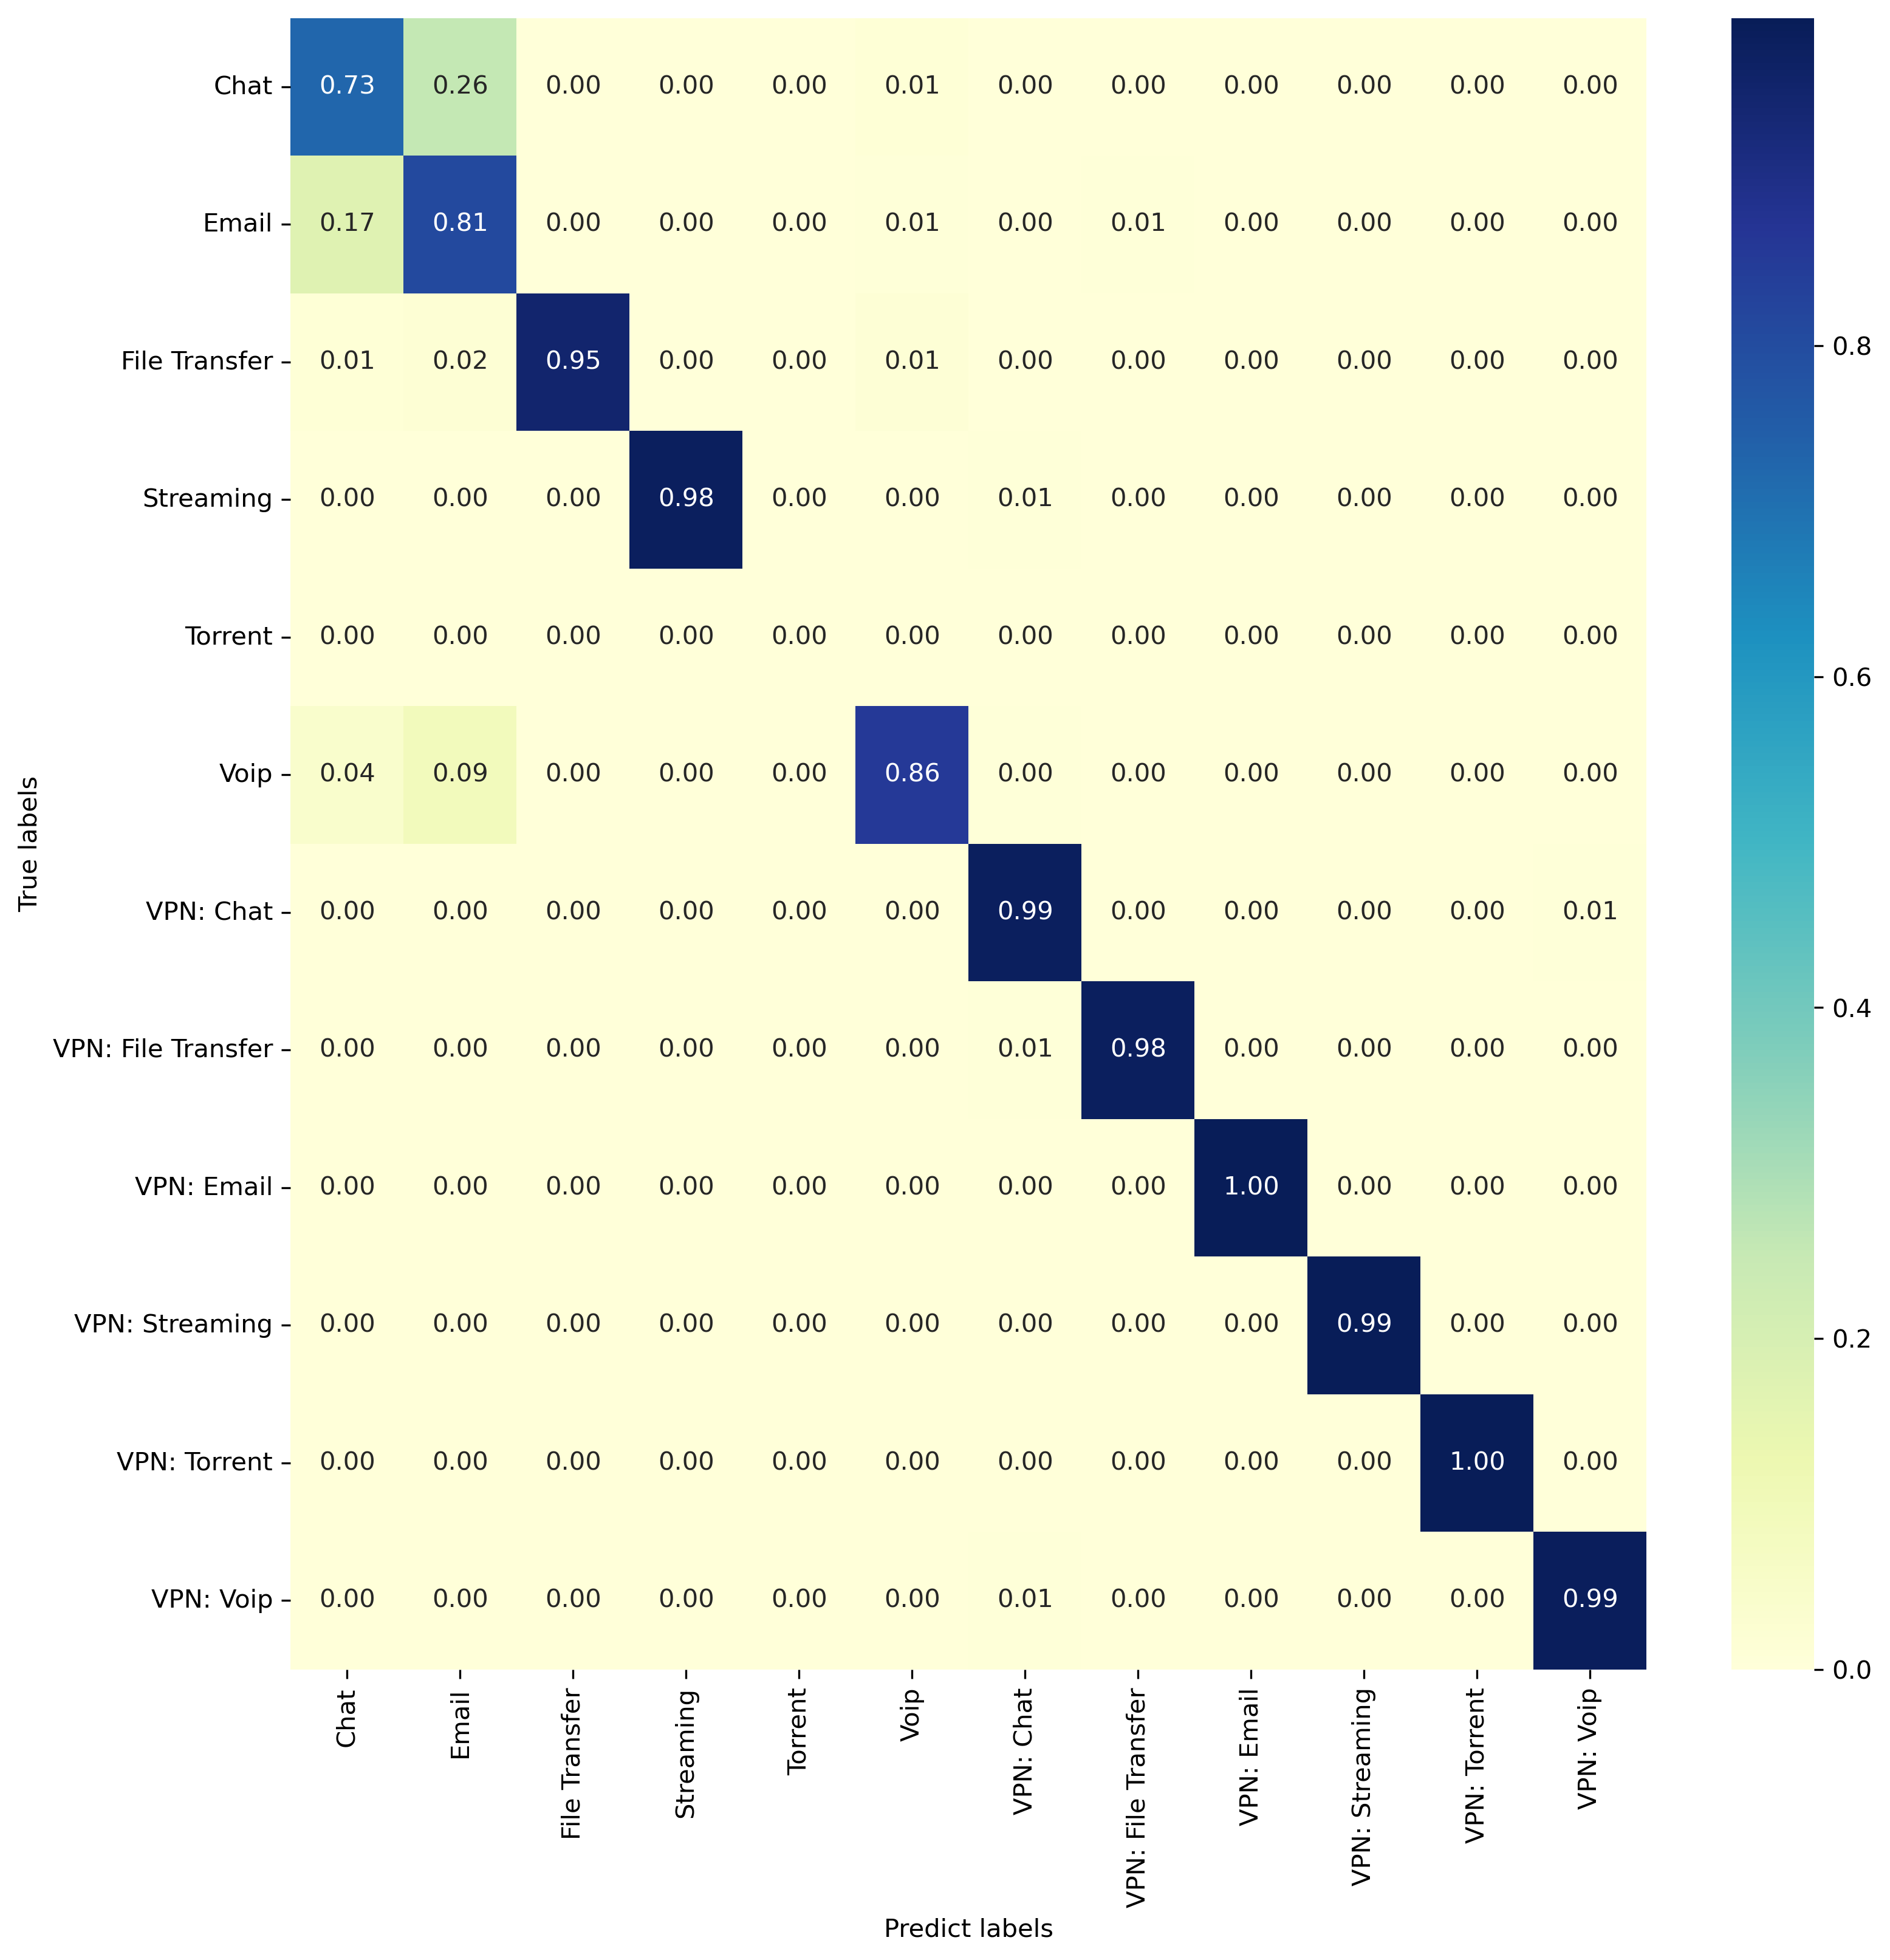

In [9]:
traffic_labels = []
for i in sorted(list(ID_TO_TRAFFIC.keys())):
    traffic_labels.append(ID_TO_TRAFFIC[i])

plot_confusion_matrix(traffic_cnn_cm, traffic_labels)

In [10]:
get_classification_report(traffic_cnn_cm, traffic_labels)


/tmp/pycharm_project_842/ml/metrics.py:42: RuntimeWarning: invalid value encountered in double_scalars
  return tp / tp_fp
/tmp/pycharm_project_842/ml/metrics.py:49: RuntimeWarning: invalid value encountered in double_scalars
  return tp / p


,label,precision,recall
0,Chat,0.239439,0.727004
1,Email,0.085033,0.810755
2,File Transfer,0.998654,0.954785
3,Streaming,0.987598,0.984392
4,Torrent,NaN,NaN
5,Voip,0.976749,0.856919
6,VPN: Chat,0.579786,0.985547
7,VPN: File Transfer,0.953355,0.983946
8,VPN: Email,0.902050,0.998110
9,VPN: Streaming,0.997615,0.994280
